# Crop Recommendation System
Precision agriculture is in trend nowadays. Precision agriculture is a modern farming technique that uses the data of soil characteristics, soil types, crop yield data, weather conditions and suggests the farmers with the most optimal crop to grow in their farms for maximum yield and profit. This technique can reduce the crop failures and will help the farmers to take informed decision about their farming strategy.In order to mitigate the agrarian crisis in the current status quo, there is a need for better recommendation systems to alleviate the crisis by helping the farmers to make an informed decision before starting the cultivation of crops.
Rana Karmakar
01-04-2022 [LinkedIn](https://www.linkedin.com/in/rana-karmakar-0972641a6)

In [1]:
# Required Libreries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras

## Dataset at a Glance

In [2]:
df = pd.read_csv("Crop_recommendation.csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


## Statistical View

In [3]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [4]:
df.shape

(2200, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [7]:
df["label"].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [8]:
df["label"].nunique()

22

## Data Visualization

<Figure size 1008x648 with 0 Axes>

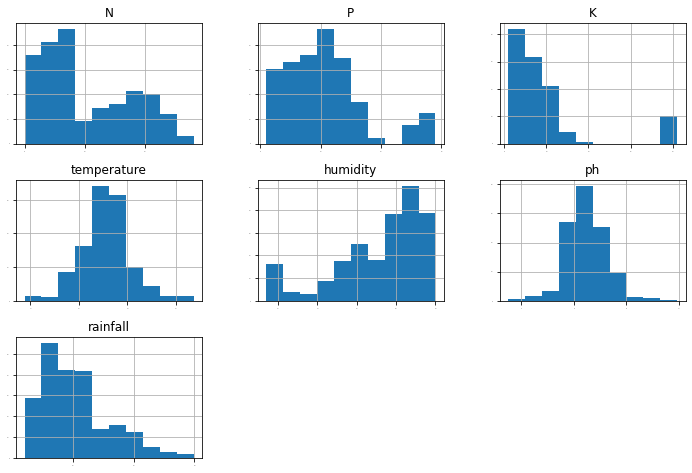

In [9]:
plt.figure(figsize=(14, 9))
df.hist(xlabelsize=1,ylabelsize=1,figsize=(12,8))
plt.show()

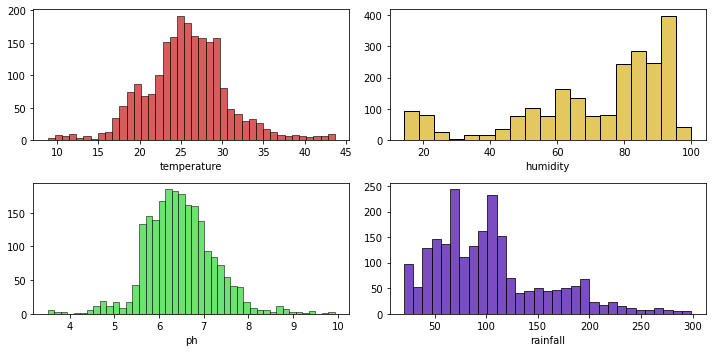

In [10]:
fig2, axs2 = plt.subplots(nrows=2, ncols=2, figsize=(10,5)) 
sns.histplot(df['temperature'], ax=axs2[0,0], color='#cc2525')
sns.histplot(df['humidity'], ax=axs2[0,1], color='#d9b629')
sns.histplot(df['ph'], ax=axs2[1,0], color='#3bd940')
sns.histplot(df['rainfall'], ax=axs2[1,1], color='#4d13ab')
axs2[0,0].set_xlabel('temperature')
axs2[0,1].set_xlabel('humidity')
axs2[1,0].set_xlabel('ph')
axs2[1,1].set_xlabel('rainfall')
axs2[0,0].set_ylabel('')
axs2[0,1].set_ylabel('')
axs2[1,0].set_ylabel('')
axs2[1,1].set_ylabel('')
fig2.tight_layout()
plt.show()

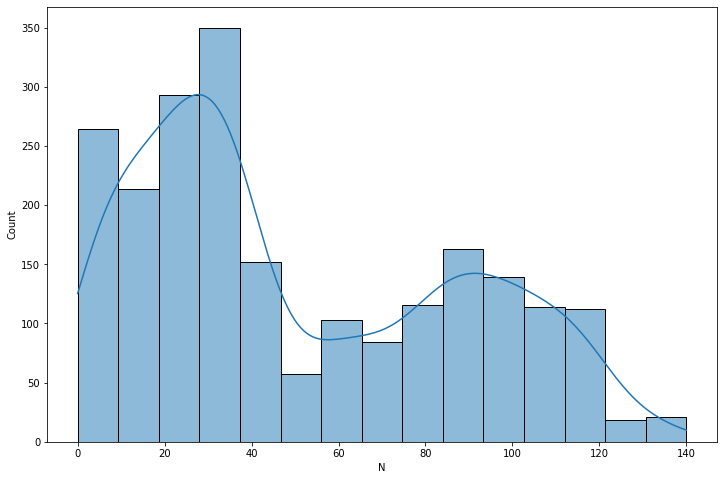

In [11]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df.N, kde=True)

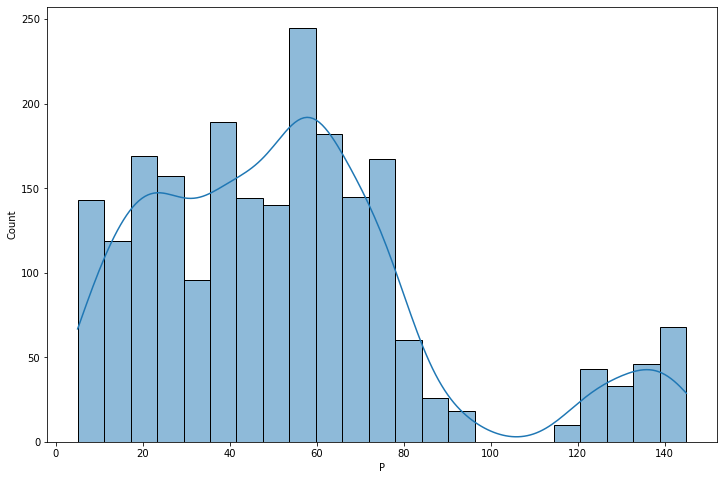

In [12]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df.P, kde=True)

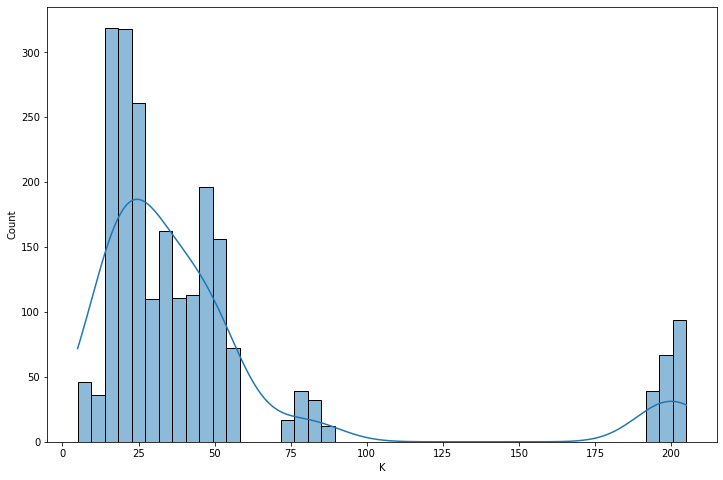

In [13]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df.K, kde=True)

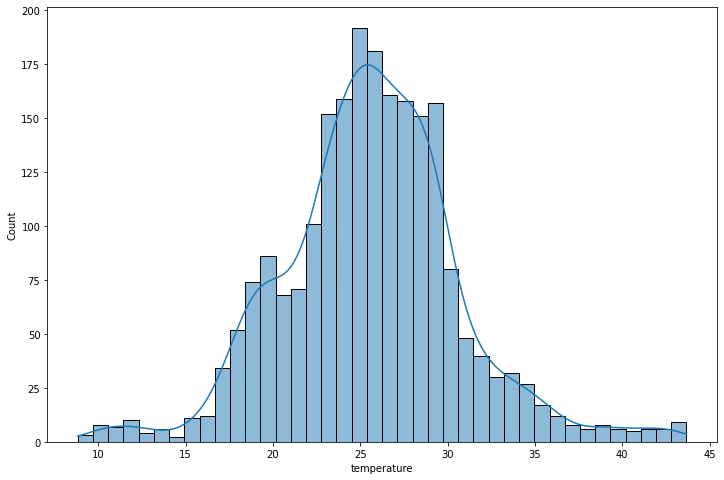

In [14]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df.temperature, kde=True)

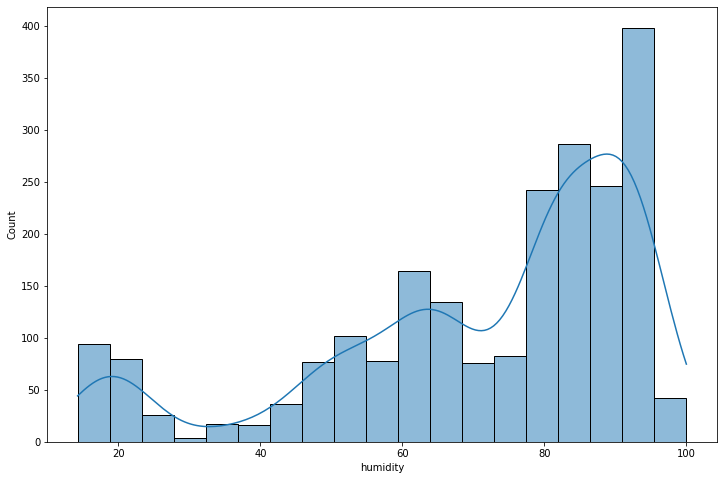

In [15]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df.humidity, kde=True)

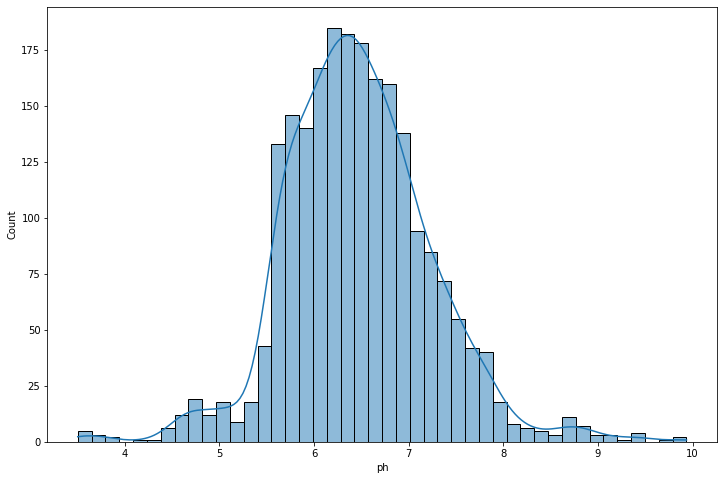

In [16]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df.ph, kde=True)

<Figure size 864x576 with 0 Axes>

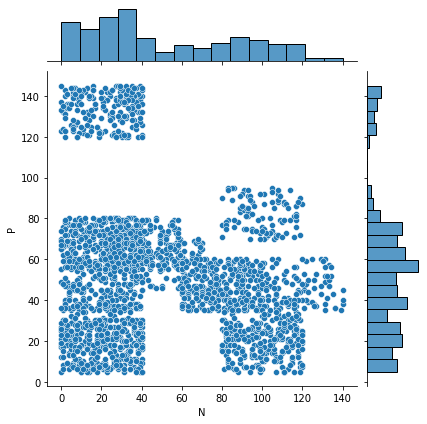

In [17]:
plt.figure(figsize=(12, 8))
sns.jointplot(x = df.N, y = df.P, data = df)
plt.show()

<Figure size 864x576 with 0 Axes>

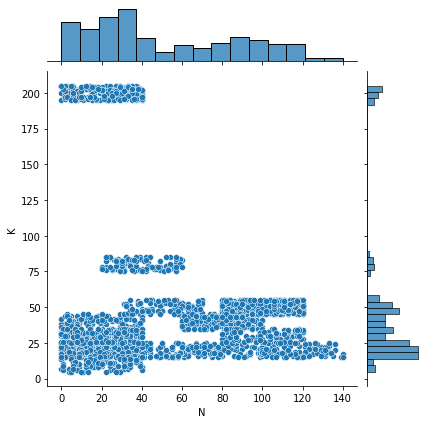

In [18]:
plt.figure(figsize=(12, 8))
sns.jointplot(x = df.N, y = df.K, data = df)
plt.show()

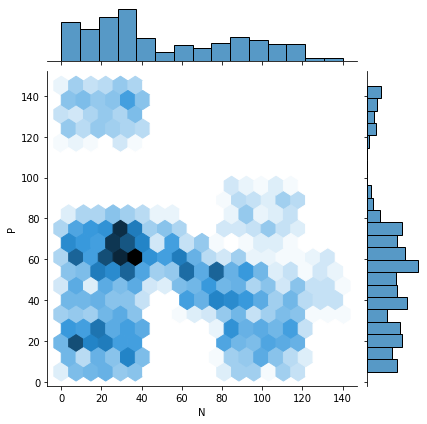

In [19]:
sns.jointplot(x = df.N, y = df.P, data = df, kind = 'hex')
plt.show()

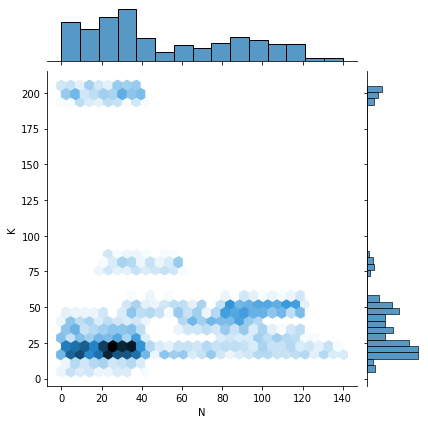

In [20]:
sns.jointplot(x = df.N, y = df.K, data = df, kind = 'hex')
plt.show()

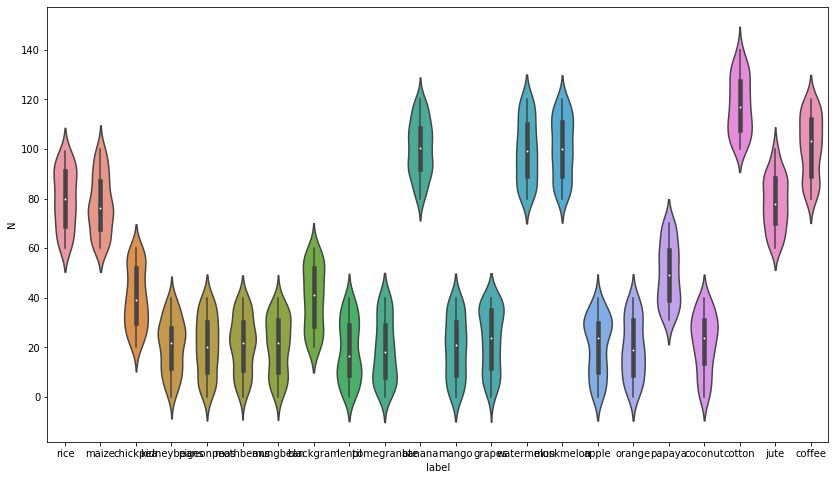

In [21]:
plt.figure(figsize=(14, 8))
sns.violinplot(x = "label", y = "N", data = df)
plt.show()

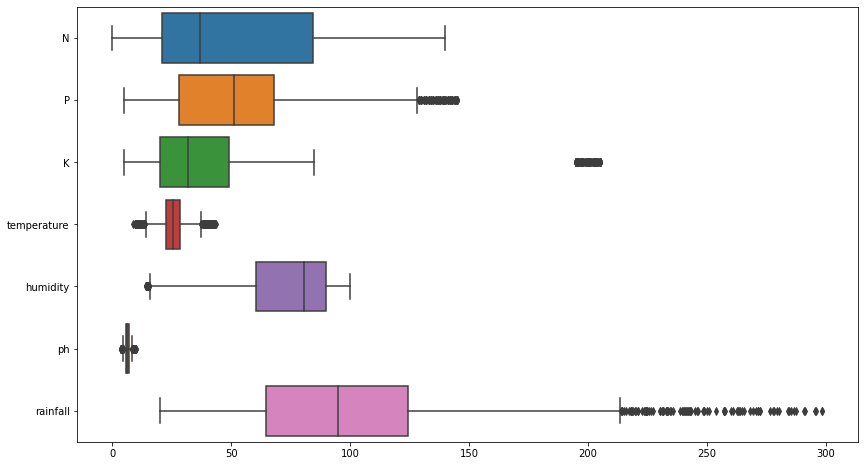

In [22]:
plt.figure(figsize=(14, 8))
sns.boxplot(data = df, orient = "h")
plt.show()

### Confusion Mtrix

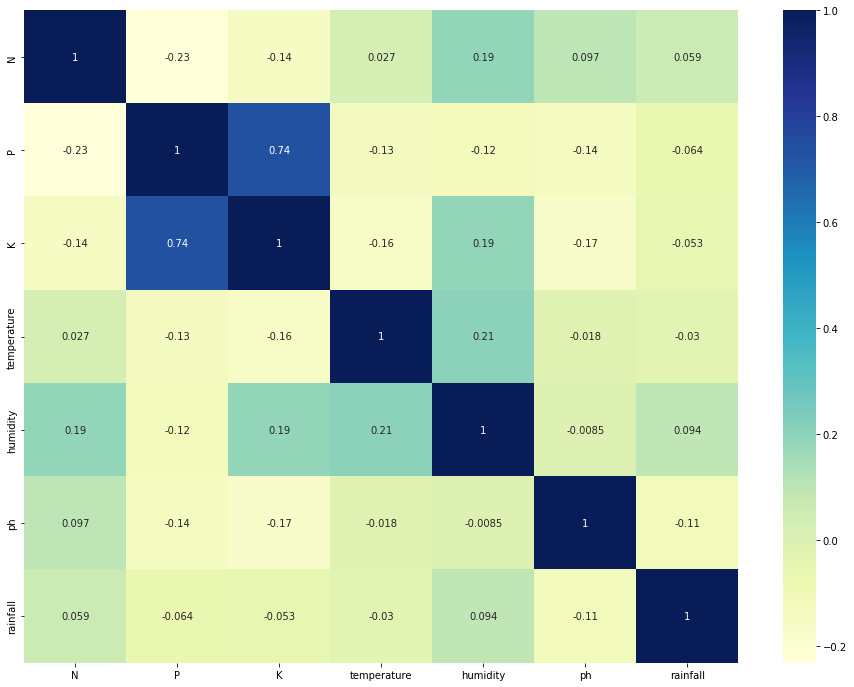

In [23]:
plt.figure(figsize=(16,12))
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

## Data Processing

In [24]:
# label encoding
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
# print(df["label"].value_counts())
df['label2']= label_encoder.fit_transform(df['label'])
print(df.head(10))

    N   P   K  temperature   humidity        ph    rainfall label  label2
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice      20
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice      20
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice      20
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice      20
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice      20
5  69  37  42    23.058049  83.370118  7.073454  251.055000  rice      20
6  69  55  38    22.708838  82.639414  5.700806  271.324860  rice      20
7  94  53  40    20.277744  82.894086  5.718627  241.974195  rice      20
8  89  54  38    24.515881  83.535216  6.685346  230.446236  rice      20
9  68  58  38    23.223974  83.033227  6.336254  221.209196  rice      20


In [25]:
maps = df[["label","label2"]].value_counts()
df.drop(columns='label', inplace=True)
maps

label        label2
apple        0         100
banana       1         100
rice         20        100
pomegranate  19        100
pigeonpeas   18        100
papaya       17        100
orange       16        100
muskmelon    15        100
mungbean     14        100
mothbeans    13        100
mango        12        100
maize        11        100
lentil       10        100
kidneybeans  9         100
jute         8         100
grapes       7         100
cotton       6         100
coffee       5         100
coconut      4         100
chickpea     3         100
blackgram    2         100
watermelon   21        100
dtype: int64

In [26]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label2
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20


## Split dataset

In [27]:
x = df.drop(columns=['label2'])
y = df['label2']

## Feature Importance

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
 
rf.fit(x,y)
rf.feature_importances_

array([0.09569779, 0.15465875, 0.17576783, 0.07222663, 0.22303464,
       0.05226864, 0.22634573])

Text(0.5, 0, 'Random Forest Feature Importance')

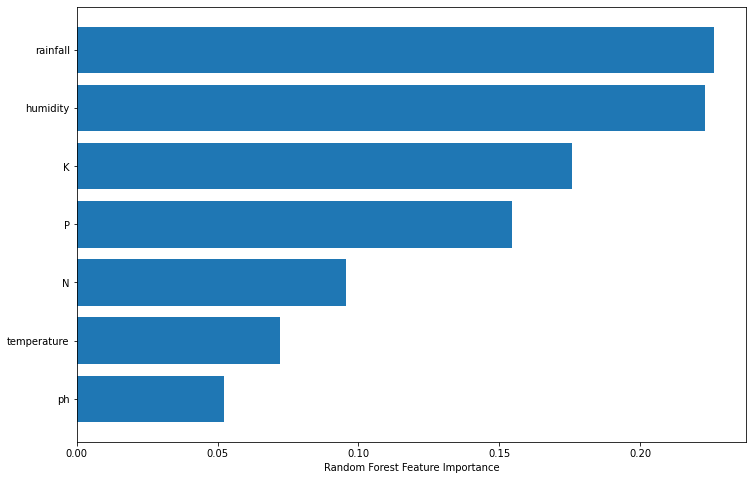

In [29]:
plt.figure(figsize=(12, 8))
sorted_idx = rf.feature_importances_.argsort()
plt.barh(df.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

## Data Normalization

In [30]:
x.std()

N              36.917334
P              32.985883
K              50.647931
temperature     5.063749
humidity       22.263812
ph              0.773938
rainfall       54.958389
dtype: float64

In [31]:
#Applying StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x_std = scaler.transform(x)
print(x_std.std())

1.0


## Train Test Split

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size=0.3)

In [33]:
print("X_train Shape -", x_train.shape)
print("X_test Shape -", x_test.shape)
print("Y_train Shape -", y_train.shape)
print("Y_test Shape -", y_test.shape)

X_train Shape - (1540, 7)
X_test Shape - (660, 7)
Y_train Shape - (1540,)
Y_test Shape - (660,)


# ANN Model

In [34]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [35]:
model = Sequential()

In [36]:
model.add(Dense(38, input_dim=7, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(22, activation='softmax'))

In [37]:
# compile the keras model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 38)                304       
                                                                 
 dense_1 (Dense)             (None, 32)                1248      
                                                                 
 dense_2 (Dense)             (None, 22)                726       
                                                                 
Total params: 2,278
Trainable params: 2,278
Non-trainable params: 0
_________________________________________________________________


In [39]:
# fit the keras model on the dataset
history = model.fit(x_train, y_train, validation_split=0.1, epochs=100, batch_size=32)

Epoch 1/100
44/44 [==============================] - 1s 7ms/step - loss: 2.9223 - accuracy: 0.1717 - val_loss: 2.6285 - val_accuracy: 0.4156
Epoch 2/100
44/44 [==============================] - 0s 4ms/step - loss: 2.4698 - accuracy: 0.4019 - val_loss: 2.1223 - val_accuracy: 0.5325
Epoch 3/100
44/44 [==============================] - 0s 3ms/step - loss: 1.9717 - accuracy: 0.5115 - val_loss: 1.6296 - val_accuracy: 0.6169
Epoch 4/100
44/44 [==============================] - 0s 3ms/step - loss: 1.4765 - accuracy: 0.6263 - val_loss: 1.1975 - val_accuracy: 0.7143
Epoch 5/100
44/44 [==============================] - 0s 3ms/step - loss: 1.0689 - accuracy: 0.7583 - val_loss: 0.8810 - val_accuracy: 0.8312
Epoch 6/100
44/44 [==============================] - 0s 3ms/step - loss: 0.7970 - accuracy: 0.8276 - val_loss: 0.6697 - val_accuracy: 0.8701
Epoch 7/100
44/44 [==============================] - 0s 3ms/step - loss: 0.6232 - accuracy: 0.8651 - val_loss: 0.5459 - val_accuracy: 0.9221
Epoch 8/100
4

# Model Evaluation

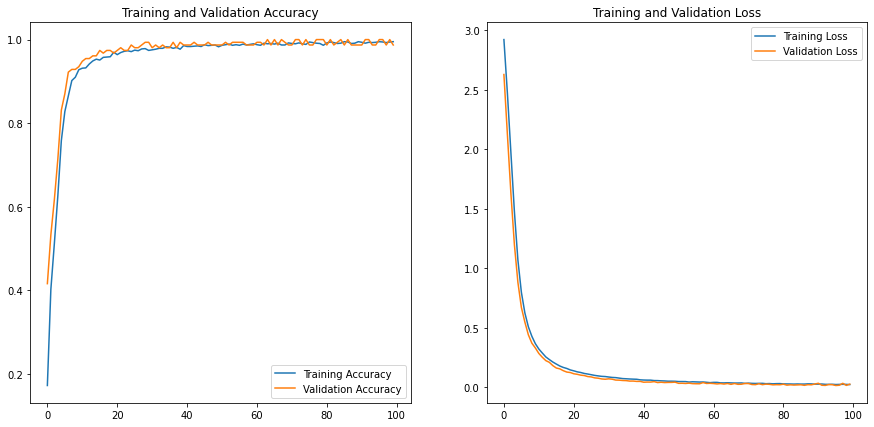

<Figure size 432x288 with 0 Axes>

In [40]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
plt.savefig("Accuracy.png")

In [41]:
scores = model.evaluate(x_test, y_test)

21/21 [==============================] - 0s 2ms/step - loss: 0.0305 - accuracy: 0.9909


In [42]:
y_predict = model.predict(x_test)
y_predict[:2]

array([[1.8129364e-06, 6.8058624e-05, 4.6531232e-17, 3.1800026e-16,
        3.0270767e-21, 1.8433447e-25, 5.1751904e-19, 9.9948823e-01,
        1.5660266e-10, 2.4360189e-22, 8.3222840e-17, 3.6331501e-21,
        1.8040979e-22, 8.2262550e-20, 9.8383770e-18, 3.4958625e-12,
        2.5644681e-18, 4.4190505e-04, 1.6137177e-17, 1.6195588e-12,
        1.5093370e-29, 3.0387349e-16],
       [6.8244814e-14, 5.8221279e-12, 6.5309438e-15, 9.9999893e-01,
        1.0890029e-20, 1.7676683e-07, 3.6290211e-21, 1.7170881e-10,
        3.0865863e-09, 8.5157575e-07, 1.0908677e-16, 4.5265808e-11,
        2.6421462e-10, 1.0266327e-11, 4.8128108e-28, 1.7197715e-26,
        3.6654043e-13, 2.7396488e-24, 3.6838099e-09, 1.4807815e-14,
        3.6718355e-24, 6.3225472e-16]], dtype=float32)

In [43]:
model.save('crop_ann_model_.h5')

In [44]:
from tensorflow import keras
model = keras.models.load_model('crop_ann_model_.h5')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 38)                304       
                                                                 
 dense_4 (Dense)             (None, 32)                1248      
                                                                 
 dense_5 (Dense)             (None, 22)                726       
                                                                 
Total params: 2,278
Trainable params: 2,278
Non-trainable params: 0
_________________________________________________________________


In [51]:
y_pred = model.predict(x_test)
y_pred

array([[1.8129364e-06, 6.8058624e-05, 4.6531232e-17, ..., 1.6195588e-12,
        1.5093370e-29, 3.0387349e-16],
       [6.8244814e-14, 5.8221279e-12, 6.5309438e-15, ..., 1.4807815e-14,
        3.6718355e-24, 6.3225472e-16],
       [4.3971723e-12, 3.7349675e-11, 1.9246554e-14, ..., 1.3914807e-13,
        5.0204701e-25, 2.4142956e-16],
       ...,
       [5.6281634e-15, 1.0298513e-09, 6.2892476e-13, ..., 2.0999806e-15,
        4.2454337e-20, 1.0634895e-12],
       [2.4625738e-04, 1.8687244e-05, 1.4932461e-17, ..., 4.8910147e-09,
        4.5404863e-28, 1.1090648e-16],
       [3.4238258e-11, 2.2763272e-05, 9.9973279e-01, ..., 7.7212611e-11,
        3.2763799e-18, 8.6868823e-10]], dtype=float32)

In [52]:
class_names = ['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee']

# Result

In [53]:
result = "------ Recommended Crop is {} with a {:.2f}% Confidance. ".format(class_names[np.argmax(y_predict[1:2])],
                                         100 * np.max(y_predict[1:2]))
print(result)

------ Recommended Crop is kidneybeans with a 100.00% Confidance. 


# Traditional Models

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import r2_score
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings("ignore")

In [56]:
# Algos to be Used
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('ABC', AdaBoostClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('XGB', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')))

In [58]:
# We see here that XGBClassifier is giving best Accuracy
results = []
names = []
for name, model in models:
    model.fit(x_train,y_train)
    prediction=model.predict(x_test)
    result = confusion_matrix(y_test, prediction)
    print("                                                                                                            ")
    print("````````````````````````````````````````````````````````````````````````````````````````````````````````````")
    print("Algorithnm :",model)
    print("````````````````````````````````````````````````````````````````````````````````````````````````````````````")
    print("Confusion Matrix:")
    result1 = classification_report(y_test, prediction)
    print("Classification Report:",)
    print (result1)
    result2 = accuracy_score(y_test,prediction)
    print ('R Squared =',r2_score(y_test, prediction))
    print("Accuracy:  ",result2*100,"%")

                                                                                                            
````````````````````````````````````````````````````````````````````````````````````````````````````````````
Algorithnm : LogisticRegression()
````````````````````````````````````````````````````````````````````````````````````````````````````````````
Confusion Matrix:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        26
           2       0.89      0.97      0.93        32
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        31
           5       1.00      1.00      1.00        33
           6       0.97      1.00      0.98        28
           7       1.00      1.00      1.00        33
           8       0.85      0.88      0.87        26
           9       0.97      0.97      0.97        31
   

# XGBClassifier 

                                                                                                            
````````````````````````````````````````````````````````````````````````````````````````````````````````````
Algorithnm : XGBClassifier(eval_metric='mlogloss', objective='multi:softprob',
              use_label_encoder=False)
````````````````````````````````````````````````````````````````````````````````````````````````````````````
Confusion Matrix:


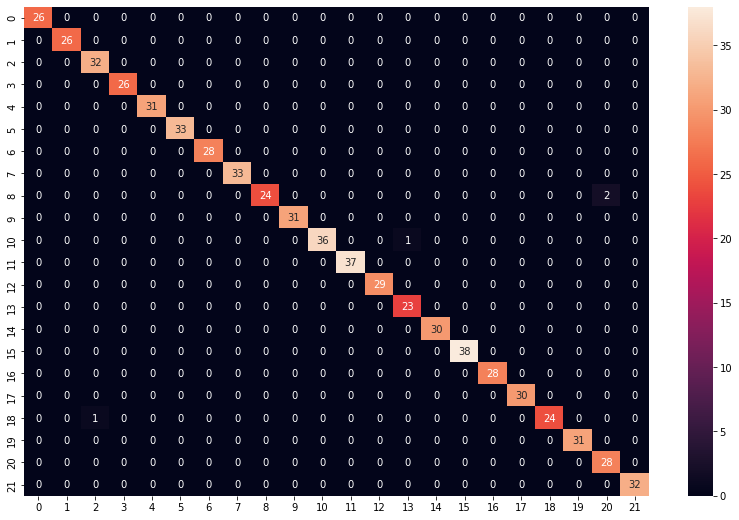

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        26
           2       0.97      1.00      0.98        32
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        31
           5       1.00      1.00      1.00        33
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        33
           8       1.00      0.92      0.96        26
           9       1.00      1.00      1.00        31
          10       1.00      0.97      0.99        37
          11       1.00      1.00      1.00        37
          12       1.00      1.00      1.00        29
          13       0.96      1.00      0.98        23
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        38
          16       1.00      1.00      1.00        28
    

In [59]:
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(x_train,y_train)
prediction=model.predict(x_test)
result = confusion_matrix(y_test, prediction)
print("                                                                                                            ")
print("````````````````````````````````````````````````````````````````````````````````````````````````````````````")
print("Algorithnm :",model)
print("````````````````````````````````````````````````````````````````````````````````````````````````````````````")
print("Confusion Matrix:")
#print(result)
plt.figure(figsize=(14, 9))
sns.heatmap(result, annot=True)
plt.show()
result1 = classification_report(y_test, prediction)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,prediction)
print ('R Squared =',r2_score(y_test, prediction))
print("Accuracy:  ",result2*100,"%")

## Model Save and Import

In [60]:
import pickle
pickle.dump(model, open('XGB_model.pkl', 'wb'))
#load saved model
model = pickle.load(open('XGB_model.pkl', 'rb'))
model.predict(x_test[:1])
class_names = ['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee']

## Result

In [61]:
result = "------ Recommended Crop is {} with a {:.2f}% Confidance. ".format(class_names[np.argmax(y_predict[1:2])],
                                         100 * np.max(y_predict[1:2]))
print(result)

------ Recommended Crop is kidneybeans with a 100.00% Confidance. 
